In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
df = pd.read_csv('dataset/survey_results_public.csv', sep=',')
js =  df['JobSatisfaction']
# salary = df['Salary']
# salarytype = df['SalaryType']
df  = df.iloc[: , :10]
df['JobSatisfaction']=js
# df['Salary']=salary
# df['SalaryType']=salarytype
df = df.dropna()
df.shape

C:\Users\fresc\AppData\Local\Programs\Python\Python37-32\lib\site-packages\IPython\core\interactiveshell.py:3173: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(53544, 11)

In [3]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,JobSatisfaction
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,Extremely satisfied
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,Moderately dissatisfied
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,Moderately satisfied
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,Neither satisfied nor dissatisfied
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,Slightly satisfied


In [4]:
df.Country.unique()

array(['Kenya', 'United Kingdom', 'United States', 'South Africa',
       'Nigeria', 'Spain', 'India', 'Israel', 'Sweden', 'Australia',
       'Greece', 'Poland', 'Argentina', 'Indonesia', 'Germany', 'Ireland',
       'France', 'Ukraine', 'Denmark', 'China', 'Latvia', 'Algeria',
       'Colombia', 'Japan', 'Russian Federation', 'Finland', 'Romania',
       'Brazil', 'Bulgaria', 'Pakistan', 'Jordan', 'Portugal', 'Italy',
       'New Zealand', 'Turkey', 'Iran, Islamic Republic of...', 'Austria',
       'Egypt', 'Netherlands', 'Belgium', 'Canada', 'Slovakia', 'Croatia',
       'Mexico', 'Norway', 'Czech Republic', 'Switzerland', 'Armenia',
       'Bangladesh', 'United Arab Emirates', 'Singapore',
       'Dominican Republic', 'Malaysia', 'Bahrain', 'Sri Lanka', 'Serbia',
       'Botswana', 'Paraguay', 'Georgia', 'Uruguay', 'Belarus',
       'Lithuania', 'Thailand', 'Estonia', 'Hungary', 'Malta', 'Myanmar',
       'Costa Rica', 'Nepal', 'Hong Kong (S.A.R.)', 'Philippines',
       'Bosnia an

In [5]:
df = df.query('Country == "India" or Country=="United States" or Country == "Italy" or Country=="South Africa"')
df

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,JobSatisfaction
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,Moderately satisfied
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,Neither satisfied nor dissatisfied
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,Slightly satisfied
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Back-end developer;Front-end developer;Full-st...,Slightly satisfied
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",Moderately satisfied
...,...,...,...,...,...,...,...,...,...,...,...
71525,101585,Yes,No,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...","1,000 to 4,999 employees",Front-end developer,Moderately satisfied
71527,101588,Yes,No,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,Back-end developer,Extremely satisfied
71528,101589,Yes,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A business discipline (ex. accounting, finance...",Fewer than 10 employees,"Back-end developer;C-suite executive (CEO, CTO...",Extremely satisfied
71529,101591,Yes,Yes,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...","10,000 or more employees",Mobile developer,Extremely satisfied


In [6]:
df = df.drop('CompanySize', axis=1)

In [7]:
df = df.replace('Bachelor’s degree (BA, BS, B.Eng., etc.)',"Bachelor")
df = df.replace('Master’s degree (MA, MS, M.Eng., MBA, etc.)',"Master")
df = df.replace('Other doctoral degree (Ph.D, Ed.D., etc.)',"Ph.D")
df

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,DevType,JobSatisfaction
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,Moderately satisfied
3,5,No,No,United States,No,Employed full-time,Bachelor,"Computer science, computer engineering, or sof...",Full-stack developer,Neither satisfied nor dissatisfied
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Data or business analyst;Desktop or enterprise...,Slightly satisfied
6,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,Slightly satisfied
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,"Back-end developer;C-suite executive (CEO, CTO...",Moderately satisfied
...,...,...,...,...,...,...,...,...,...,...
71525,101585,Yes,No,India,No,Employed full-time,Bachelor,"Computer science, computer engineering, or sof...",Front-end developer,Moderately satisfied
71527,101588,Yes,No,India,"Yes, full-time",Employed full-time,Bachelor,"Computer science, computer engineering, or sof...",Back-end developer,Extremely satisfied
71528,101589,Yes,No,United States,No,Employed full-time,Bachelor,"A business discipline (ex. accounting, finance...","Back-end developer;C-suite executive (CEO, CTO...",Extremely satisfied
71529,101591,Yes,Yes,United States,No,Employed full-time,Bachelor,"Another engineering discipline (ex. civil, ele...",Mobile developer,Extremely satisfied


In [8]:
df = df.query("FormalEducation == 'Ph.D' or FormalEducation == 'Bachelor' or FormalEducation=='Master'")
df = df.drop('Student', axis=1)
df = df.drop('DevType', axis=1)
df = df.drop('Respondent', axis=1)
df

,Hobby,OpenSource,Country,Employment,FormalEducation,UndergradMajor,JobSatisfaction
3,No,No,United States,Employed full-time,Bachelor,"Computer science, computer engineering, or sof...",Neither satisfied nor dissatisfied
13,No,No,India,Employed full-time,Bachelor,"Another engineering discipline (ex. civil, ele...",Extremely satisfied
24,Yes,No,India,Employed full-time,Master,"Computer science, computer engineering, or sof...",Moderately satisfied
27,No,No,United States,Employed full-time,Bachelor,"A social science (ex. anthropology, psychology...",Moderately satisfied
28,Yes,Yes,United States,Employed full-time,Bachelor,"Computer science, computer engineering, or sof...",Extremely satisfied
...,...,...,...,...,...,...,...
71525,Yes,No,India,Employed full-time,Bachelor,"Computer science, computer engineering, or sof...",Moderately satisfied
71527,Yes,No,India,Employed full-time,Bachelor,"Computer science, computer engineering, or sof...",Extremely satisfied
71528,Yes,No,United States,Employed full-time,Bachelor,"A business discipline (ex. accounting, finance...",Extremely satisfied
71529,Yes,Yes,United States,Employed full-time,Bachelor,"Another engineering discipline (ex. civil, ele...",Extremely satisfied


In [9]:
def check_values():
    for n in df.columns:
        print(n)
        print(df[n].unique())

<AxesSubplot:>

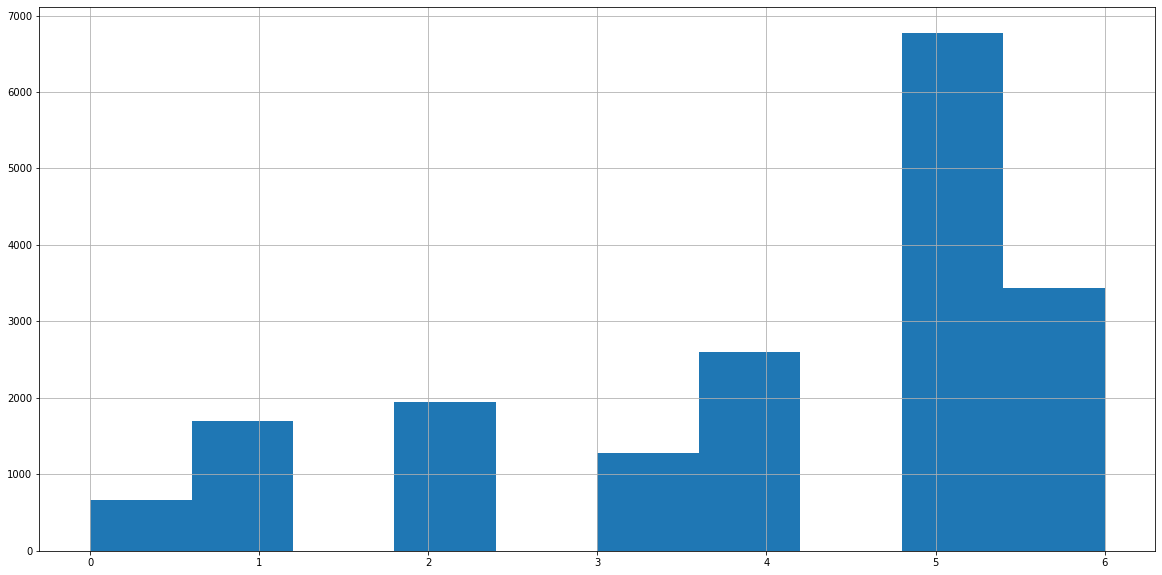

In [10]:
js_dict = {
    'Extremely satisfied':6,
    'Moderately satisfied':5,
    'Slightly satisfied':4,
    'Neither satisfied nor dissatisfied':3, 
    'Slightly dissatisfied':2,
    'Moderately dissatisfied':1,
    'Extremely dissatisfied':0
}

plt.figure(figsize=[20,10])
df['JobSatisfaction'] = df['JobSatisfaction'].map(js_dict)
df['JobSatisfaction'].hist()

Replace Undergrad major values with Stem/non-stem. Delete 'i never Declared a major'

In [11]:
check_values()

Hobby
['No' 'Yes']
OpenSource
['No' 'Yes']
Country
['United States' 'India' 'South Africa' 'Italy']
Employment
['Employed full-time' 'Employed part-time']
FormalEducation
['Bachelor' 'Master' 'Ph.D']
UndergradMajor
['Computer science, computer engineering, or software engineering'
 'Another engineering discipline (ex. civil, electrical, mechanical)'
 'A social science (ex. anthropology, psychology, political science)'
 'Web development or web design'
 'A natural science (ex. biology, chemistry, physics)'
 'Fine arts or performing arts (ex. graphic design, music, studio art)'
 'A humanities discipline (ex. literature, history, philosophy)'
 'A business discipline (ex. accounting, finance, marketing)'
 'Mathematics or statistics'
 'Information systems, information technology, or system administration'
 'A health science (ex. nursing, pharmacy, radiology)'
 'I never declared a major']
JobSatisfaction
[3 6 5 0 1 2 4]


<AxesSubplot:xlabel='FormalEducation', ylabel='Country'>

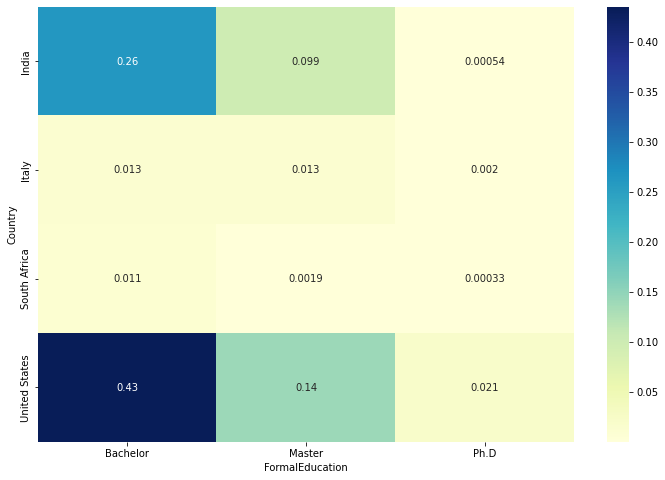

In [12]:
a = df.query('JobSatisfaction=="Neither satisfied nor dissatisfied"')
# a = a.groupby('Country')['Respondent'].count()
# b = df.groupby('Country')['Respondent'].count()
# a/b
# df.query('Country=="Italy"').shape
# df.shape
df.query('Employment =="Employed full-time"').shape[0]/df.shape[0]
# df = df[df['JobSatisfaction']!="Neither satisfied nor dissatisfied"]

contigency_pct = pd.crosstab(df['Country'], df['FormalEducation'], normalize='all')
contigency_pct
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

In [13]:
c, p, dof, expected = chi2_contingency(contigency_pct)
p

0.999999746792149

In [14]:
a = 0
b = 0
mat=np.zeros([7,7])
for i in df.columns:
    for j in df.columns:
        contigency_pct = pd.crosstab(df[i], df[j])
        c, p, dof, expected = chi2_contingency(contigency_pct)
        print(i,j,":",p)
        mat[a][b]=p
        b=b+1
    a = a+1
    b=0

Hobby Hobby : 0.0
Hobby OpenSource : 1.8943523288807258e-208
Hobby Country : 0.0015202187330951903
Hobby Employment : 0.4710185002775018
Hobby FormalEducation : 0.34835242768931063
Hobby UndergradMajor : 0.005540542433909045
Hobby JobSatisfaction : 0.0014587793432692122
OpenSource Hobby : 1.8943523288808334e-208
OpenSource OpenSource : 0.0
OpenSource Country : 5.353459971786939e-16
OpenSource Employment : 0.06596313185791074
OpenSource FormalEducation : 2.3950709782153245e-08
OpenSource UndergradMajor : 1.7620231301004023e-05
OpenSource JobSatisfaction : 5.308322788119514e-10
Country Hobby : 0.0015202187330951912
Country OpenSource : 5.353459971786939e-16
Country Country : 0.0
Country Employment : 0.0006882405532031674
Country FormalEducation : 1.9136126083317547e-88
Country UndergradMajor : 0.0
Country JobSatisfaction : 3.4605770643860615e-153
Employment Hobby : 0.4710185002775018
Employment OpenSource : 0.06596313185791074
Employment Country : 0.0006882405532031674
Employment Employm

<AxesSubplot:>

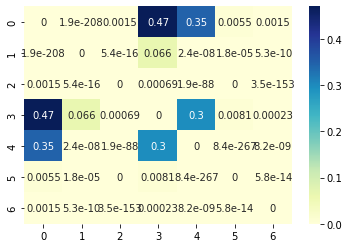

In [15]:
sns.heatmap(mat, annot=True, cmap="YlGnBu")

 (>=0.05 Independent)

<AxesSubplot:>

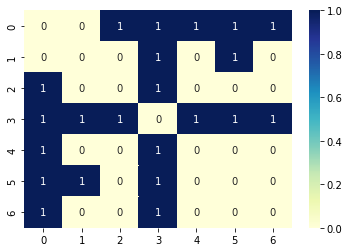

In [16]:
# alpha = 0.0005 #should be 0.05, used to prune even more dependent values so that the graph has less edges
alpha = 5e-7
sns.heatmap((lambda x: x>=alpha)(mat), annot=True, cmap="YlGnBu")
